In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import os 
from pathlib import Path

In [10]:
directory1 = Path.home() / 'Desktop' / 'epp_repo' / 'eppfinalproject_moritzraykowski' / 'src' / 'epp_final_project_MoritzRaykowski' / 'data_cleaned'
os.chdir(directory1)
df = pd.read_excel('surveydatawpython.xlsx', sheet_name='Sheet1')

In [13]:
directory2 = Path.home() / 'Desktop' / 'epp_repo' / 'eppfinalproject_moritzraykowski' / 'bld' / 'figures_statapython'
os.chdir(directory2)

In [14]:
independent_vars = ["Treatment_binary"]

Naive Regression Model for Treatment Effects

In [15]:
# regression estimates for the outcomes (reported policy scores) only on binary treatment indicator
formula1 = f"{'INCLUSION'} ~ {' + '.join(independent_vars)}"
mod_1 = smf.ols(formula1, data=df).fit(cov_type='HC2')
formula2 = f"{'RECOMMENDATION'} ~ {' + '.join(independent_vars)}"
mod_2 = smf.ols(formula2, data=df).fit(cov_type='HC2')
formula3 = f"{'INTEREST'} ~ {' + '.join(independent_vars)}"
mod_3 = smf.ols(formula3, data=df).fit(cov_type='HC2')
formula4 = f"{'PROBLEMSOLVING'} ~ {' + '.join(independent_vars)}"
mod_4 = smf.ols(formula4, data=df).fit(cov_type='HC2')
formula5 = f"{'POPULARITY'} ~ {' + '.join(independent_vars)}"
mod_5 = smf.ols(formula5, data=df).fit(cov_type='HC2')

In [16]:
#building a data frame with the results of the regression to be used for the coefficient plots
dfs = []
for i, mod in enumerate([mod_1, mod_2, mod_3, mod_4, mod_5]):
    err_series = mod.params - mod.conf_int()[0]
    dfs.append(pd.DataFrame({'coef': mod.params.values[1:],
                             'err': err_series.values[1:],
                             'varname': err_series.index.values[1:],
                             'model': f'model {i+1}'}))

coef_df = pd.concat(dfs, ignore_index=True)

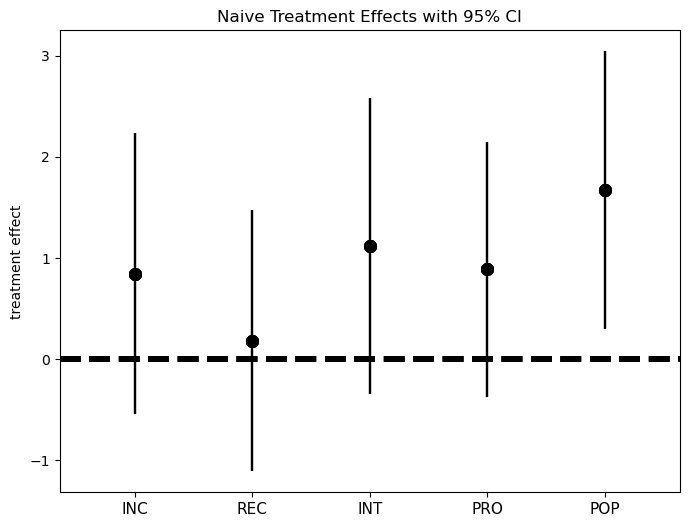

In [17]:
# building the figure containing the plot
X = np.array([1, 2, 3, 4, 5])
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Naive Treatment Effects with 95% CI')
for i, mod in enumerate(coef_df.model):
    ax.bar(X, coef_df['coef'],  
           color='none',yerr=coef_df['err'])
    ax.set_ylabel('treatment effect')
    ax.set_xlabel('')
    ax.scatter(x=X,
               marker = 'o', s=70,
               y=coef_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.set_xticks(X)
    ax.set_xticklabels(['INC', 'REC', 'INT', 'PRO', 'POP'], fontsize=11)
    fig.savefig(r'naive_model.jpg')

Progressed Regression Model with covariates

In [18]:
# regression estimates for the outcomes (reported policy scores) on binary treatment indicator, controls, and covariates
independent_vars2 = ["Treatment_binary", "sex", "age", "education", "disabled_encoded", "council_existence_encoded", 
                     "partymember_encoded", "city_district"]
formula6 = f"{'INCLUSION'} ~ {' + '.join(independent_vars2)}"
pro_1 = smf.ols(formula6, data=df).fit(cov_type='HC2')
formula7 = f"{'RECOMMENDATION'} ~ {' + '.join(independent_vars2)}"
pro_2 = smf.ols(formula7, data=df).fit(cov_type='HC2')
formula8 = f"{'INTEREST'} ~ {' + '.join(independent_vars2)}"
pro_3 = smf.ols(formula8, data=df).fit(cov_type='HC2')
formula9 = f"{'PROBLEMSOLVING'} ~ {' + '.join(independent_vars2)}"
pro_4 = smf.ols(formula9, data=df).fit(cov_type='HC2')
formula10 = f"{'POPULARITY'} ~ {' + '.join(independent_vars2)}"
pro_5 = smf.ols(formula10, data=df).fit(cov_type='HC2')

#building a data frame with the results of the regression to be used for the coefficient plots
dfs2 = []
for i, pro in enumerate([pro_1, pro_2, pro_3, pro_4, pro_5]):
    err_series2 = pro.params - pro.conf_int()[0]
    dfs2.append(pd.DataFrame({'coef': pro.params.values[1:],
                             'err': err_series2.values[1:],
                             'varname': err_series2.index.values[1:],
                             'model': f'model {i+1}'}))

coef_df2 = pd.concat(dfs2, ignore_index=True)

#cutting the stored results of control variables to only have treatment indicator and covariates
coef_df2_cut = coef_df2.loc[(coef_df2['varname'] == 'Treatment_binary') | (coef_df2['varname'] == 'partymember_encoded') 
                            | (coef_df2['varname'] == 'disabled_encoded')] 



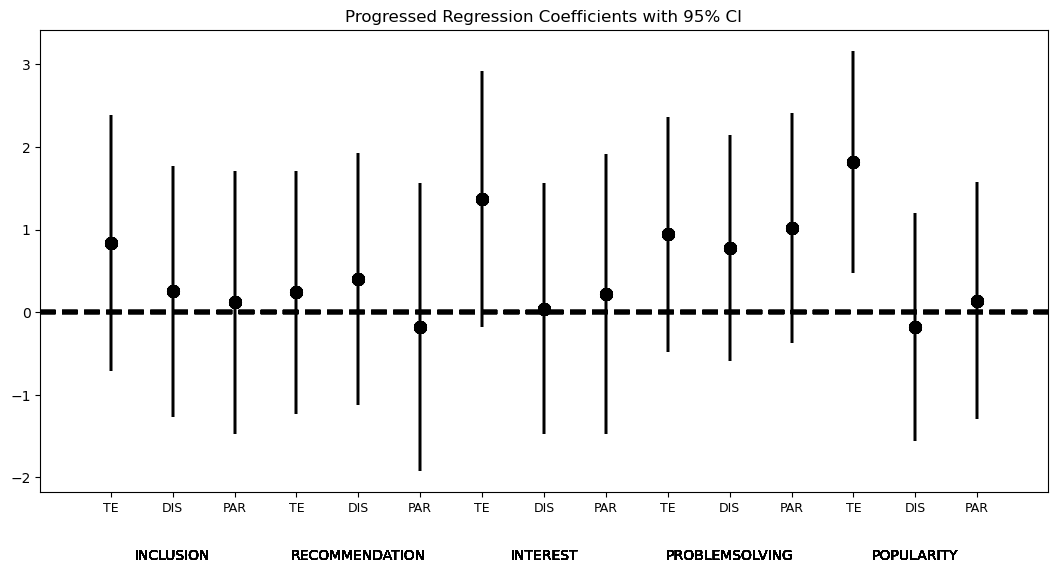

In [19]:
# building the figure containing the plot
Z = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
fig2, ax2 = plt.subplots(figsize=(13, 6))
ax2.set_title('Progressed Regression Coefficients with 95% CI')
for i, pro in enumerate(coef_df2_cut.model):
    ax2.bar(Z, coef_df2_cut['coef'],  
           color='none',yerr=coef_df2_cut['err'])
    ax2.set_ylabel('')
    ax2.set_xlabel('')
    ax2.scatter(x=Z,
               marker = 'o', s=70,
               y=coef_df2_cut['coef'], color='black')
    ax2.axhline(y=0, linestyle='--', color='black', linewidth=3)
    ax2.set_xticks(Z)
    ax2.set_xticklabels(['TE', 'DIS', 'PAR', 'TE', 'DIS', 'PAR', 'TE', 'DIS', 'PAR', 'TE', 'DIS', 'PAR', 'TE', 'DIS', 'PAR'], fontsize=9)
    ax2.text(2, -3, 'INCLUSION', ha='center', fontsize=10)
    ax2.text(5, -3, 'RECOMMENDATION', ha='center', fontsize=10)
    ax2.text(8, -3, 'INTEREST', ha='center', fontsize=10)
    ax2.text(11, -3, 'PROBLEMSOLVING', ha='center', fontsize=10)
    ax2.text(14, -3, 'POPULARITY', ha='center', fontsize=10)
    fig2.savefig(r'progressed_model.jpg')

Robustness Check for Popularity Score under different specifications

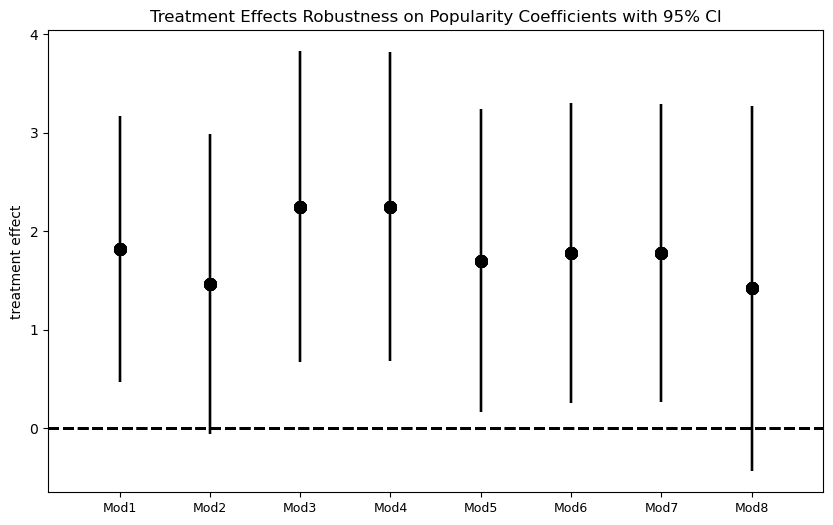

In [20]:
#creating the group level on which to cluster standard errors
clusters = df["citydistrict_ID"]
subset_attrition = df[df['ControlvsAttrition'].isin([0, 1])]
cluster_subset_attrition = df.loc[subset_attrition.index]['citydistrict_ID']
subset_full = df[df['ControlvsFull'].isin([0, 1])]
cluster_subset_full = df.loc[subset_full.index]['citydistrict_ID']

# regressions for various robustness checks on the popularity score estimate, the ITT on popularity
#1
rob_vars1 = ["Treatment_binary", "sex", "age", "education", "disabled_encoded", "council_existence_encoded", 
             "partymember_encoded", "city_district"]
formula11 = f"{'POPULARITY'} ~ {' + '.join(rob_vars1)}"
rob_1 = smf.ols(formula11, data=df).fit(cov_type='cluster', cov_kwds={'groups': clusters})
#2
rob_vars2 = ["Treatment_binary", "sex", "age", "education", "disabled_encoded", "council_existence_encoded", 
             "partymember_encoded", "city_district", "electoral_terms_encoded", "voluntary_full_position", "electoral_process"]
formula12 = f"{'POPULARITY'} ~ {' + '.join(rob_vars2)}"
rob_2 = smf.ols(formula12, data=df).fit(cov_type='HC2')
#3
rob_vars3 = ["ControlvsAttrition", "sex", "age", "education", "disabled_encoded", "council_existence_encoded", 
             "partymember_encoded", "city_district", "population", "reelection_coming_encoded"]
formula13 = f"{'POPULARITY'} ~ {' + '.join(rob_vars3)}"
rob_3 = smf.ols(formula13, data=df).fit(cov_type='HC2')
#4
rob_vars4 = ["ControlvsAttrition", "sex", "age", "education", "disabled_encoded", "council_existence_encoded", 
             "partymember_encoded", "city_district", "population", "reelection_coming_encoded"]
formula14 = f"{'POPULARITY'} ~ {' + '.join(rob_vars4)}"
rob_4 = smf.ols(formula14, data=df).fit(cov_type='cluster', cov_kwds={'groups': cluster_subset_attrition}) 
#5
rob_vars5 = ["ControlvsAttrition", "voluntary_full_position", "electoral_process", "electoral_terms_encoded", 
             "reelection_coming_encoded", "citizen_politician", "population", "sex", "age", "education", 
             "disabled_encoded", "council_existence_encoded", "partymember_encoded", "city_district"]
formula15 = f"{'POPULARITY'} ~ {' + '.join(rob_vars5)}"
rob_5 = smf.ols(formula15, data=df).fit(cov_type='HC2')
#6
rob_vars6 = ["ControlvsFull", "sex", "age", "education", "disabled_encoded", "council_existence_encoded", 
             "partymember_encoded", "city_district"]
formula16 = f"{'POPULARITY'} ~ {' + '.join(rob_vars6)}"
rob_6 = smf.ols(formula16, data=df).fit(cov_type='HC2')
#7
rob_vars7 = ['ControlvsFull', "sex", "age", "education", "disabled_encoded", "council_existence_encoded", 
             "partymember_encoded", "city_district"]
formula17 = f"{'POPULARITY'} ~ {' + '.join(rob_vars7)}"
rob_7 = smf.ols(formula17, data=df).fit(cov_type='cluster', cov_kwds={'groups': cluster_subset_full})
#8
rob_vars8 = ["ControlvsFull", "voluntary_full_position", "electoral_process", "electoral_terms_encoded", 
             "sex", "age", "education", "disabled_encoded", "council_existence_encoded", "partymember_encoded", "city_district"] 
formula18 = f"{'POPULARITY'} ~ {' + '.join(rob_vars8)}"
rob_8 = smf.ols(formula18, data=df).fit(cov_type='HC2')

#building the data frame with the results
dfs3 = []
for i, rob in enumerate([rob_1, rob_2, rob_3, rob_4, rob_5, rob_6, rob_7, rob_8]):
    err_series3 = rob.params - rob.conf_int()[0]
    dfs3.append(pd.DataFrame({'coef': rob.params.values[1:],
                             'err': err_series3.values[1:],
                             'varname': err_series3.index.values[1:],
                             'model': f'model {i+1}'}))

#cutting control variable results
coef_df3 = pd.concat(dfs3, ignore_index=True)
coef_df3_cut = coef_df3.loc[(coef_df3['varname'] == 'Treatment_binary') | (coef_df3['varname'] == 'ControlvsAttrition') 
                            | (coef_df3['varname'] == 'ControlvsFull')] 

#building figure with plot
W = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fig3, ax3 = plt.subplots(figsize=(10, 6))
ax3.set_title('Treatment Effects Robustness on Popularity Coefficients with 95% CI')
for i, rob in enumerate(coef_df3_cut.model):
    ax3.bar(W, coef_df3_cut['coef'],  
           color='none',yerr=coef_df3_cut['err'])
    ax3.set_ylabel('treatment effect')
    ax3.set_xlabel('')
    ax3.scatter(x=W,
               marker = 'o', s=70,
               y=coef_df3_cut['coef'], color='black')
    ax3.axhline(y=0, linestyle='--', color='black', linewidth=2)
    ax3.set_xticks(W)
    ax3.set_xticklabels(['Mod1', 'Mod2', 'Mod3', 'Mod4', 'Mod5', 'Mod6', 'Mod7', 'Mod8'], fontsize=9)
    fig3.savefig(r'robustness_on_popularity.jpg')